In [12]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
# from torch.utils.tensorboard import SummaryWriter
import warnings

warnings.simplefilter("ignore")
test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
model = torch.load('iterdrop49.pth', map_location=torch.device('cpu'))
from PIL import Image
classes = ['0', '180', '270', '90']
def predict(model, test_image_name):

    transform = test_transform

    test_image = Image.open(test_image_name).convert('RGB')
    plt.imshow(test_image)

    test_image_tensor = transform(test_image)
#     print(test_image_tensor.size())

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)

    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        _ , b = (torch.max(out,1))
#         print(out)
#         print(train_data_loader.dataset.classes[b.item()])
        ps = torch.exp(out)
        topk, topclass = ps.topk(1, dim=1)
#     print(ps)
#     print(topk,topclass)
    return classes[b.item()], topk.cpu().numpy()[0][0]



In [ ]:
import os
import shutil
curr_path="/home/sidharth/Documents/datasets/students_id"
copy_coll_path="/home/sidharth/Documents/verify_id/app/result/college_id"
copy_pan_path="/home/sidharth/Documents/verify_id/app/result/pan"
copy_aadhar_path="/home/sidharth/Documents/verify_id/app/result/aadhar"
copy_personal_path="/home/sidharth/Documents/verify_id/app/result/personal"
count=0
per=0
for file in os.listdir(curr_path):
    count+=1
    
    if count<10213:
        continue
    print(file)
    result=predict(model,os.path.join(curr_path, file))
    
    
    """if result[0]=='college_id'and result[1]>=0.99:
        shutil.move(os.path.join(curr_path, file), os.path.join(copy_coll_path, file))
    elif result[0]=='aadhar' and result[1]>=0.90:
        shutil.move(os.path.join(curr_path, file),os.path.join(copy_aadhar_path, file))
    elif result[0]=='pancard'and result[1]>=0.90:
        shutil.move(os.path.join(curr_path, file),os.path.join(copy_pan_path, file))"""
    if result[0]=='personal_photo' and result[1]>=0.90:
        per+=1
        shutil.copy(os.path.join(curr_path, file),os.path.join(copy_personal_path, file))     
    print(count, per)    

        

('90', 0.8717416)


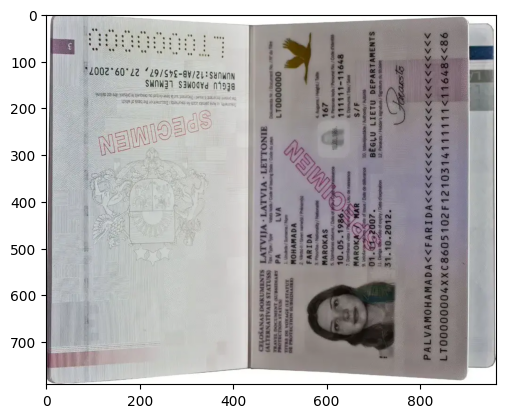

In [31]:
import os
import shutil
curr_path="/home/sidharth/Downloads"
result=predict(model,os.path.join(curr_path, "2l.webp"))
print(result)
